<a href="https://colab.research.google.com/github/Barrok/auto-mpg/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load required libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as Agnes

In [4]:
# load data
df = pd.read_fwf("auto-mpg.data", header = None)

# check how data frame looks like
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [5]:
# list contains column names
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# assign names to columns
df.columns = col_names
df['model_year'] = df['model_year'] + 1900
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,1982,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,1982,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,1982,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,1982,1,"""ford ranger"""


In [6]:
# check if there are any missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [7]:
# basic statistics of data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,1976.010050,3.697627,1970.0,1973.000,1976.0,1979.000,1982.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [16]:
import seaborn as sns

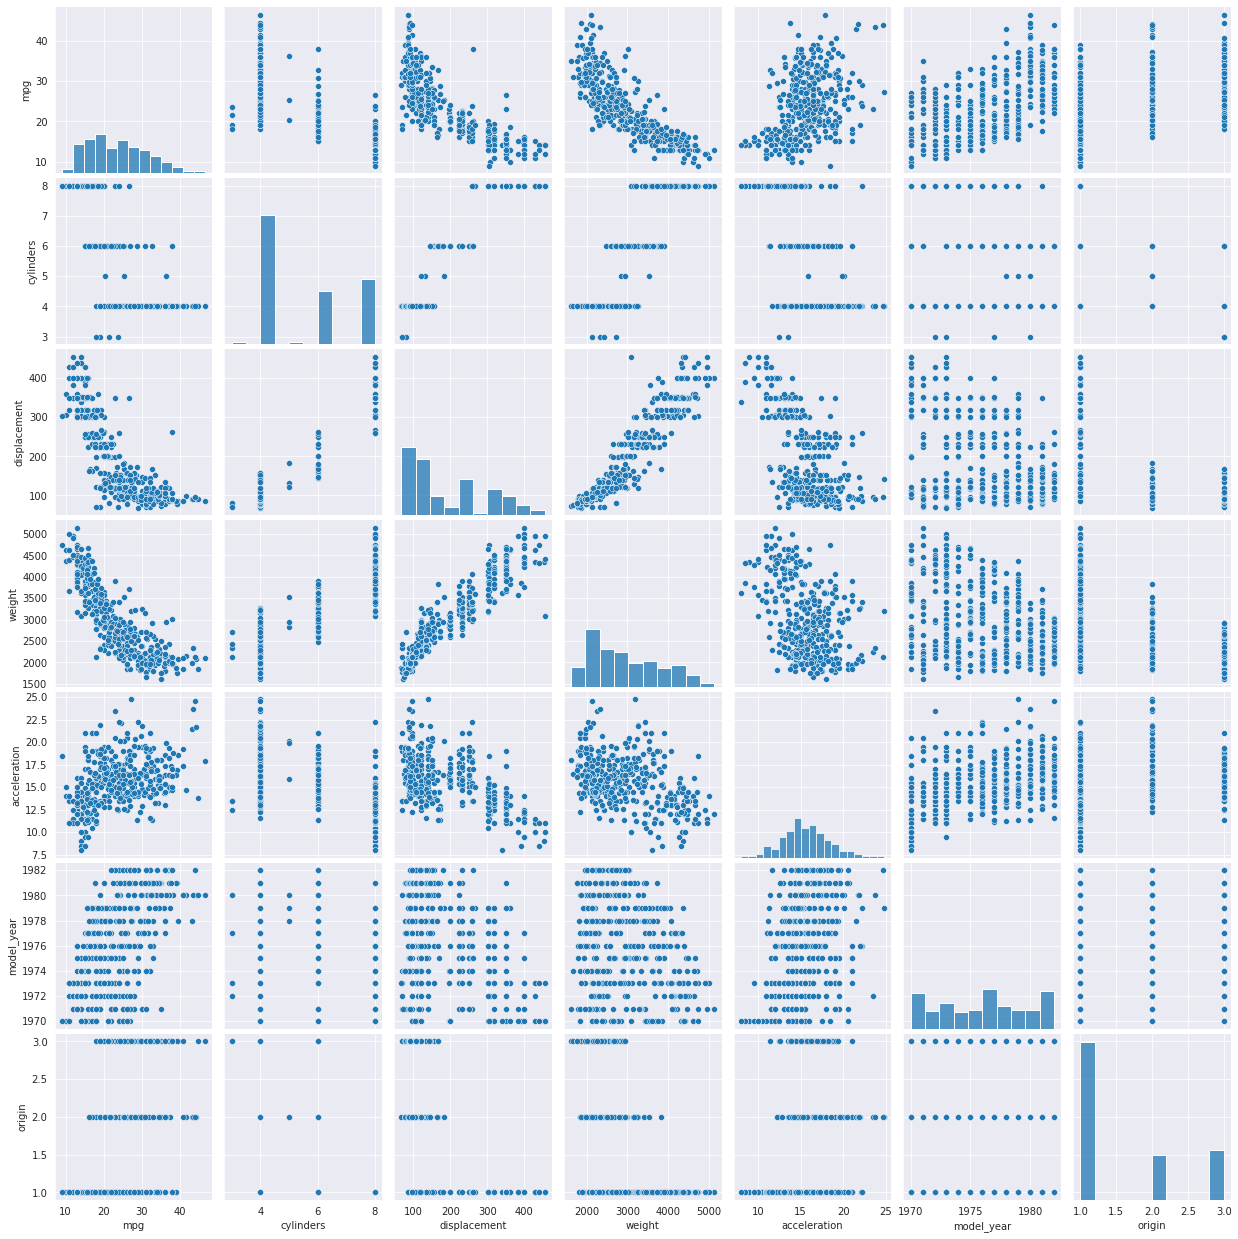

In [17]:
sns.set_style("darkgrid")

sns.pairplot(df)

In [26]:
from scipy.stats import zscore
#dropping the Column name "car_name"
df1 = df.drop(['car_name'], axis = 1)
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1


In [32]:
# check what types are variables
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [44]:
# horsepower is a string, so I'll have to change it into float before standarization
df1['horsepower'] = df1['horsepower'].replace('?', "0")
df1['horsepower'] = df1['horsepower'].astype('float')
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [46]:
# standarization
dfst = df1.apply(zscore)
dfst.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145


Text(0.5, 1.0, 'Selecting number od clusters with the Elbow Method')

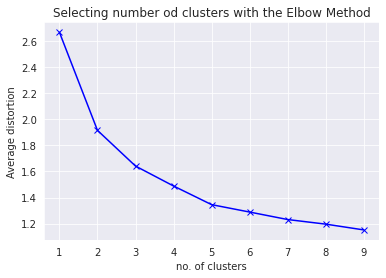

In [52]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfst)
    prediction=model.predict(dfst)
    meanDistortions.append(sum(np.min(cdist(dfst, model.cluster_centers_, 'euclidean'), axis=1)) / dfst.shape[0])

# visualization 
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('Average distortion')
plt.title('Selecting number od clusters with the Elbow Method')

In [53]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfst)
prediction=final_model.predict(dfst)

#Append the prediction 
df1["GROUP"] = prediction
dfst["GROUP"] = prediction
print("Groups Assigned : \n")
dfst.head()

Groups Assigned : 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145,0
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145,0
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145,0
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145,0
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145,0


In [55]:
dlcust1 = dfst.groupby(['GROUP'])
dlcust1.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
GROUP,,,,,,,,
0,-0.909728,1.042705,1.024129,0.831569,0.970343,-0.446585,-0.444357,-0.692853
1,0.664497,-0.761628,-0.748059,-0.607407,-0.708773,0.326201,0.324574,0.506084


In [60]:
#Seting the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15)
kmeans.fit(dfst)

centroids = kmeans.cluster_centers_
#centroids

#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(dfst) )
print(centroid_df)

        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.523175   0.445586      0.357871   -0.040084  0.356983      0.329387   
1  0.702588  -0.816004     -0.784419   -0.619428 -0.741227      0.338357   
2 -1.163797   1.498191      1.503923    1.479382  1.404098     -1.086149   

   model_year    origin         GROUP  
0   -0.025021 -0.671085  1.294118e-01  
1    0.305156  0.567424  1.000000e+00  
2   -0.688324 -0.715145 -3.330669e-16  


In [61]:
centroid_df.mean()


mpg            -0.328128
cylinders       0.375925
displacement    0.359125
horsepower      0.273290
weight          0.339951
acceleration   -0.139468
model_year     -0.136063
origin         -0.272935
GROUP           0.376471
dtype: float64

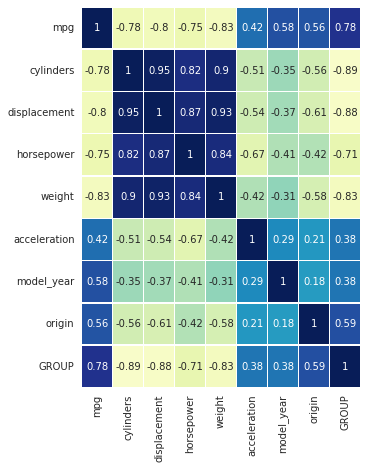

In [63]:
plt.figure(figsize=(5,7))
sns.heatmap(dfst.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
#This time I'll use hierarchical clustering, method = Agnes

for k in clusters:
    model=Agnes(n_clusters=k)
    model.fit(dfst)
    prediction = model.fit_predict(dfst)
    meanDistortions.append(sum(np.min(cdist(dfst, model.cluster_centers_, 'euclidean'), axis=1)) / dfst.shape[0])